In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import zipfile
import math
from nltk.corpus import stopwords
from string import punctuation
# Specify the path to the zip file you want to unzip
zip_file_path = "/content/A1_DATASET.zip"

# Specify the directory where you want to extract the contents
extracted_dir_path = "/content/A1_DATASET"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extracted_dir_path)

print(f"Successfully extracted contents to {extracted_dir_path}")

Successfully extracted contents to /content/A1_DATASET


In [ ]:
# Read the text dataset file
# Convert everything to lower case
with open('/content/A1_DATASET/A1_DATASET/train.txt', 'r') as file:
    text = file.read().lower()

# Tokenize the text into words
words = text.split()

In [ ]:
# Read the text dataset file
#with open('your_dataset.txt', 'r') as file:
 #   text = file.read()

# Tokenize the text into words
words = text.split()
english_stopwords = stopwords.words("english")
# words = [word for word in words if word not in english_stopwords]
# words = [word for word in words if word not in punctuation]
# Removing stopwords

# Initialize a dictionary to store word frequencies
word_frequencies = {}

# Calculate word frequencies
for word in words:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

vocabulary_size = len(word_frequencies.keys())

# Initialize a dictionary to store bigram frequencies
bigram_frequencies = {}

# Calculate bigram frequencies
for i in range(len(words) - 1):
    bigram = (words[i], words[i + 1])
    if bigram in bigram_frequencies:
        bigram_frequencies[bigram] += 1
    else:
        bigram_frequencies[bigram] = 1

# Initialize a dictionary to store bigram probabilities
bigram_model = {}
bigram_model_addone = {}
bigram_model_addk = {}
k = 0.5
# Calculate bigram probabilities
for bigram, frequency in bigram_frequencies.items():
    first_word = bigram[0]
    probability = math.log(frequency) - math.log(word_frequencies[first_word])
    probability_add_one = math.log(frequency + 1) - math.log(word_frequencies[first_word] + vocabulary_size)
    probability_add_k = math.log(frequency + k) - math.log(word_frequencies[first_word] + k * vocabulary_size)
    bigram_model[bigram] = probability
    bigram_model_addone[bigram] = probability_add_one
    bigram_model_addk[bigram] = probability_add_k
bigram_model['<unk>'] = 0
bigram_model_addone['<unk>'] = math.log(1/vocabulary_size)
bigram_model_addk['<unk>'] = math.log(k / k * vocabulary_size)

In [ ]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame(list(bigram_frequencies.items()), columns=['Bigram', 'Frequency'])

# Calculate bigram probabilities and add them to the DataFrame
df['Probability'] = df.apply(lambda row: math.log(row['Frequency']) - math.log(word_frequencies[row['Bigram'][0]]), axis=1)

# Display the DataFrame
print(df.sort_values(by=['Frequency'], ascending = False).head(10))  # Display the top 7 most common bigrams

           Bigram  Frequency  Probability
176      (., the)        905    -1.645679
59         (., i)        604    -2.050040
104  (the, hotel)        413    -2.550504
11        (., we)        407    -2.444801
201     (in, the)        406    -1.131720
89      (of, the)        343    -1.114998
8       (at, the)        332    -0.808249
67       (,, and)        322    -2.214670
177   (the, room)        295    -2.886976
275    (and, the)        281    -2.222216


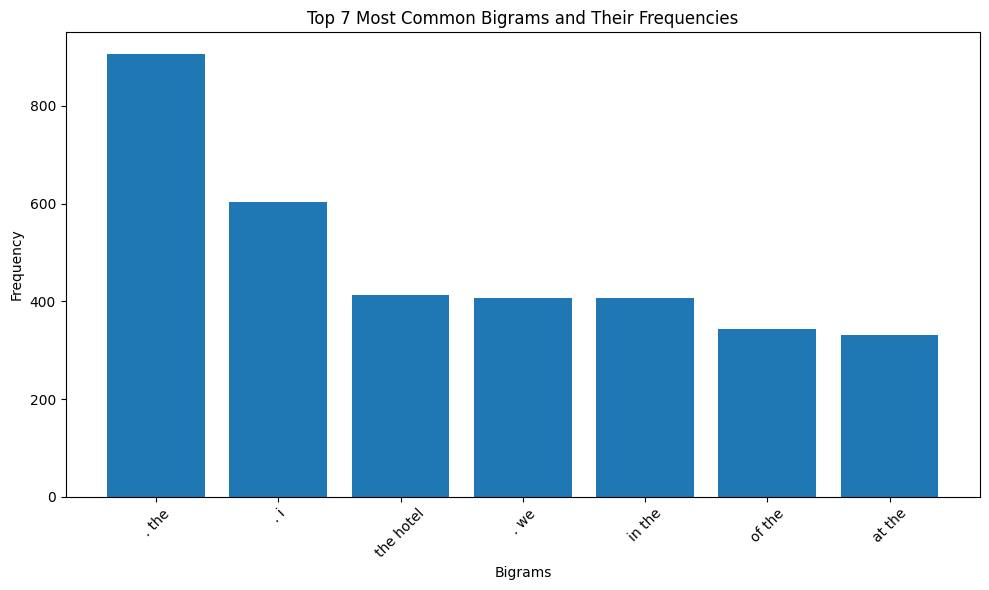

In [ ]:
import matplotlib.pyplot as plt

# Sort the bigram frequencies by descending order
sorted_bigram_frequencies = sorted(bigram_frequencies.items(), key=lambda x: x[1], reverse=True)

# Take the top 7 most common bigrams
top_bigrams = sorted_bigram_frequencies[:7]

# Separate the bigrams and frequencies
bigrams, frequencies = zip(*top_bigrams)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar([f"{bigram[0]} {bigram[1]}" for bigram in bigrams], frequencies)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Bigrams and Their Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculate bigram probabilities with add-one smoothing
df['Probability'] = df.apply(lambda row: math.log(row['Frequency'] + 1) - math.log((word_frequencies[row['Bigram'][0]] + vocabulary_size)), axis=1)

# Display the DataFrame
print(df.head(7))  # Display the top 7 bigrams with smoothed probabilities


           Bigram  Frequency  Probability
0     (i, booked)         21    -5.906847
1   (booked, two)          1    -8.081166
2    (two, rooms)          3    -7.394493
3   (rooms, four)          1    -8.098795
4  (four, months)          1    -8.070906
5    (months, in)          2    -7.663564
6   (in, advance)          7    -6.861580


In [ ]:
# Define the smoothing constant (k)
k = 0.5  # You can adjust this value based on your requirements

# Calculate bigram probabilities with add-k smoothing
df['Probability'] = df.apply(lambda row: math.log((row['Frequency'] + k)) - math.log((word_frequencies[row['Bigram'][0]] + k * vocabulary_size)), axis=1)

# Display the DataFrame
print(df.head(7))  # Display the top 7 bigrams with smoothed probabilities


           Bigram  Frequency  Probability
0     (i, booked)         21    -5.428121
1   (booked, two)          1    -7.688913
2    (two, rooms)          3    -6.854355
3   (rooms, four)          1    -7.723415
4  (four, months)          1    -7.668561
5    (months, in)          2    -7.153990
6   (in, advance)          7    -6.385532


In [ ]:
# Define the smoothing constant (k)
k = 2  # You can adjust this value based on your requirements

# Calculate bigram probabilities with add-k smoothing
df['Probability'] = df.apply(lambda row: math.log((row['Frequency'] + k)) - math.log(word_frequencies[row['Bigram'][0]] + k * vocabulary_size), axis=1)

# Display the DataFrame
print(df.head(7))  # Display the top 7 bigrams with smoothed probabilities


           Bigram  Frequency  Probability
0     (i, booked)         21    -6.444062
1   (booked, two)          1    -8.362175
2    (two, rooms)          3    -7.854614
3   (rooms, four)          1    -8.371088
4  (four, months)          1    -8.357024
5    (months, in)          2    -8.068403
6   (in, advance)          7    -7.350944


In [ ]:
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read().lower()
        return text
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

def calculate_perplexity(text, probabilities):
    text = text.split()
    # text = [word for word in text if word not in english_stopwords]
    # text = [word for word in text if word not in punctuation]
    bigrams = [b for b in zip(text[:-1], text[1:])]
    likelihood = 0
    N = len(bigrams)

    for bigram in bigrams:
        if bigram in probabilities.keys():
          probability = probabilities[bigram]
        else:
          probability = probabilities['<unk>']
        likelihood -= probability

    perplexity = 2 ** (likelihood / N)
    # perplexity = 1/N * likelihood
    return perplexity

# Usage example
file_path = '/content/A1_DATASET/A1_DATASET/val.txt'  # Replace with the path to your validation text file
validation_text = read_text_file(file_path)

if validation_text:
    perplexity = calculate_perplexity(validation_text, bigram_model)  # Assuming you have the bigram_probabilities dictionary
    print(f"UnSmoothed Bigram Model Perplexity: {perplexity:.2f}")
    perplexity = calculate_perplexity(validation_text, bigram_model_addone)  # Assuming you have the bigram_probabilities dictionary
    print(f"Laplace Smoothed Bigram Model Perplexity: {perplexity:.2f}")
    perplexity = calculate_perplexity(validation_text, bigram_model_addk)  # Assuming you have the bigram_probabilities dictionary
    print(f"Add K Smoothed Bigram Model Perplexity: {perplexity:.2f}")




UnSmoothed Bigram Model Perplexity: 5.21
Laplace Smoothed Bigram Model Perplexity: 123.81
Add K Smoothed Bigram Model Perplexity: 2.49
